In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The use case

Illustrated here with an example that we often come across: we want to zoom in on a small peak and take a look.

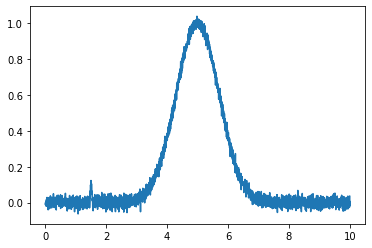

In [2]:
x = np.linspace(0,10,3000)
y = np.exp(-(x-5)**2)
y += np.random.normal(size=len(x))*0.02
y += np.exp(-(x-1.5)**2/0.001)*0.1
plt.plot(x,y)

I can zoom xlim, but this is not helpful for me looking at the peak:

(1.0, 2.0)

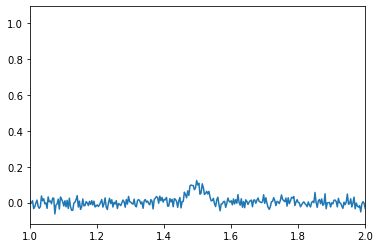

In [3]:
plt.plot(x,y)
plt.xlim(1,2)

Of course, I could then, after zooming, also manually specify y range by looking at plot and hard coding it. But why not autoscale it (like default behaviour of matlab and gnuplot)? 

It's not hard as long as you have access to the data, but it's a lot of boiler plate to copy paste each time, but also not enough to justify a library. I think a lot of people want it. 

How could this be implemented? It's something that is only really relevant for the x-axis of "1d" line plots. So it could just be a (rc configurable?) flag (like figure.dpi, which I override myself in 99% of my notebooks). 

Concretely: 

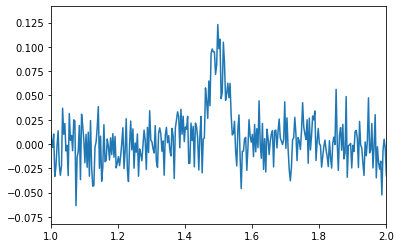

In [6]:
def my_xlim(x1,x2,adjust_ylim = False):
    plt.xlim(x1,x2)
    if adjust_ylim:
        mask = (x>x1)*(x<x2)
        y_plot = y[mask]
        y_plot_min = np.min(y_plot)
        y_plot_max = np.max(y_plot)
        delta_y = y_plot_max - y_plot_min
        y_plot_max += delta_y/10
        y_plot_min -= delta_y/10
        plt.ylim(y_plot_min, y_plot_max)

plt.plot(x,y)
my_xlim(1,2, adjust_ylim=True)

Of course, this makes no sense for setting x limits of a colormap plot for example, so a check would be needed to ignore the flag / rc parameter for anything other than 1d line plots. I'm also not sure what the reasonable behaviour would be if there were multiple datasets plotted, probably just use the range of all of them. This would not be so useful probably for the goal in this case, but in any case, it's not a big deal I would say. 